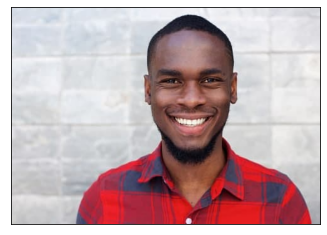

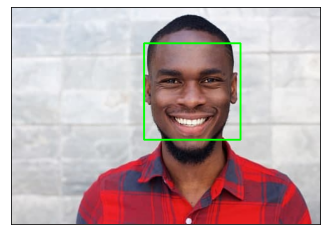

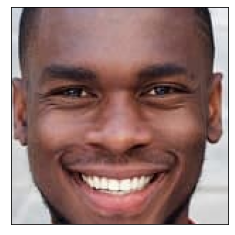

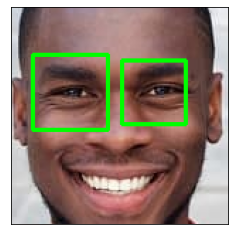

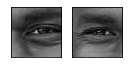

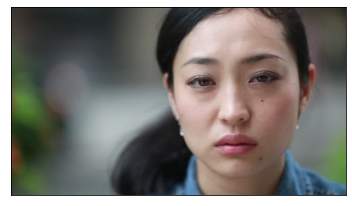

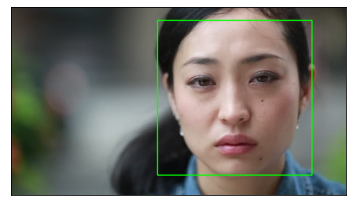

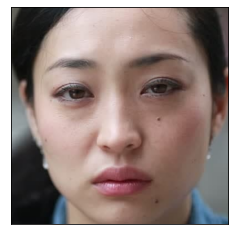

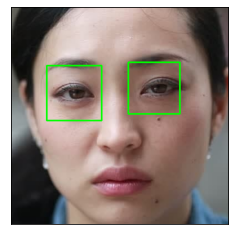

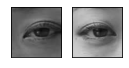

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy

def removePlotterAxes():
    plt.figure()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pass

def multiPlot(imgs, figsize, no_rows, no_cols):
    plt.figure(figsize = figsize)
    for j in range(len(imgs)):
        plt.subplot(no_rows, no_cols, j+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imgs[j])

def plotImg(img):
    removePlotterAxes()
    plt.imshow(img)
    pass

def detect(img_path):
    img = cv2.imread(img_path)
    imgToCrop = copy.copy(img)
    plotImg(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    roi = []
    face_imgs = []
    eye_imgs = []
    faces = faceCascade.detectMultiScale(imgToCrop, 1.1, 16)
    for(x, y, w, h) in faces:
        roi.append(imgToCrop[y:y+h, x:x+w])
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plotImg(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    for j in range(len(roi)):
        face_imgs.append(cv2.cvtColor(roi[j], cv2.COLOR_BGR2RGB))

    eyes = None
    for face in face_imgs:
        plotImg(face)
        img = face
        imgToCrop = copy.copy(img)
        roi = []
        eyes = eyeCascade.detectMultiScale(face, 1.1, 16)
        for(x, y, w, h) in eyes:
            roi.append(cv2.cvtColor(cv2.cvtColor(imgToCrop[y:y+h, x:x+w], cv2.COLOR_BGR2GRAY), cv2.COLOR_BGR2RGB))
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plotImg(img)
        if eyes is not None:    
            multiPlot(roi, [2, 2], 1, len(eyes))
        
    return roi

x = detect('C:/Users/Moh.Massoud/man.jpg')
y = detect('C:/Users/Moh.Massoud/woman.jpg')